<a href="https://colab.research.google.com/github/KARTHI3106/liftoff__/blob/main/regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index([], dtype='object')
Mean Squared Error: 2429423922.530744
R-squared (Random Forest): 0.8902115834269836


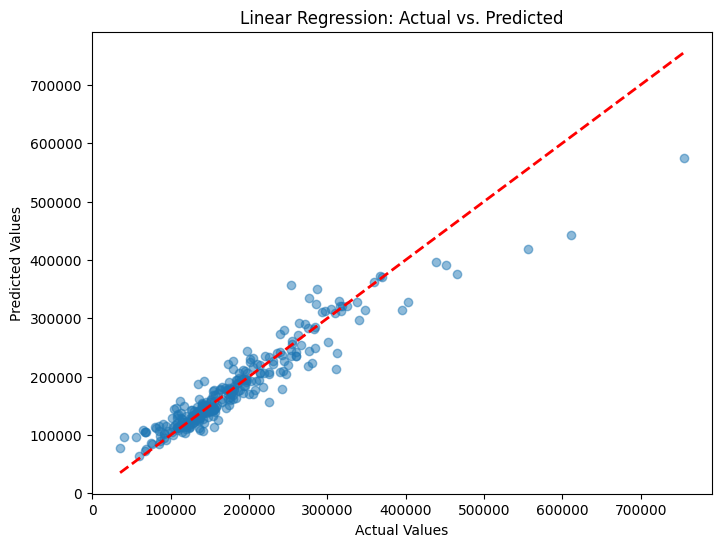

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

train_data = '/content/sample_data/train.csv'
df_train = pd.read_csv(train_data)

x = df_train.drop(columns=["SalePrice"])
y = df_train["SalePrice"]

print(x.select_dtypes(include=['object']).columns)

x = pd.get_dummies(x, drop_first=True)

print(x.select_dtypes(include=['object']).columns)

x = x.fillna(x.median())


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)


y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
reg.score(x_test, y_test)
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
forest.score(x_test, y_test)

r2_forest = r2_score(y_test, y_pred)
print(f"R-squared (Random Forest): {r2_forest}")


import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()


